# Análise de solicitação de crédito

**Objetivo desta análise**: determinar para cada solicitação de crédito o valor de **Risk** baseado nos outros atributos (por exemplo, Age, Sex, Job, Housing, ...).

Este dataset e a descrição do problema estão disponíveis em https://www.kaggle.com/uciml/german-credit

$Risk \leftarrow Age + Sex + Job + \cdots + Purpose$

## Aquisição dos dados e pré-processamento

In [1]:
import pandas as pd
df = pd.read_csv("../../../dataset/german_credit_data.csv")

In [2]:
type(df)

pandas.core.frame.DataFrame

In [3]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
df.shape

(1000, 11)

In [5]:
df = df.drop(columns=['Unnamed: 0'])

## Análise descritiva

In [6]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [7]:
df = df.rename(columns={
    "Age": "age", 
    "Sex": "sex", 
    "Job": "job", 
    "Housing": "housing", 
    "Saving accounts": "savingAccount",
    "Checking account": "checkingAccount",
    "Credit amount": "creditAmount",
    "Duration": "duration",
    "Purpose": "purpose",
    "Risk": "risk"
})

In [8]:
df.head()

,age,sex,job,housing,savingAccount,checkingAccount,creditAmount,duration,purpose,risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [9]:
df['risk'].value_counts()

good    700
bad     300
Name: risk, dtype: int64

Visto que a variável Risk é categórica então podemos dizer que este é um problema de **classificação**.

Isto é importante para: 
* Definir as métricas de como o modelo será avaliado, e;
* Escolher o melhor algoritmo para criar o modelo.

Descrição dos atributos: 

* Age (numeric)
* Sex (text: male, female)
* Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
* Housing (text: own, rent, or free)
* Saving accounts (text - little, moderate, quite rich, rich)
* Checking account (numeric, in DM - Deutsch Mark)
* Credit amount (numeric, in DM)
* Duration (numeric, in month)
* Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

**Vamos deixar a transformação dos atributos categóricos para numéricos nos scripts de pipeline** 

<AxesSubplot:>

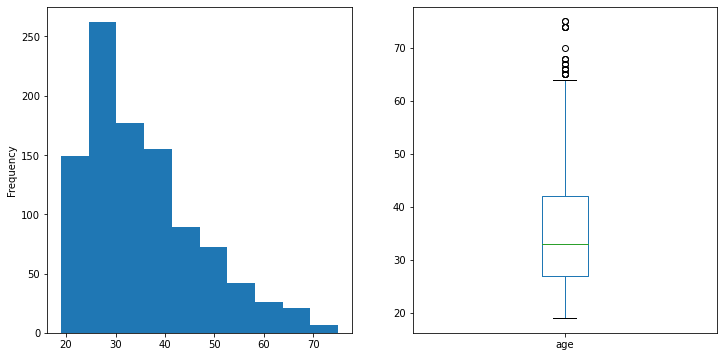

In [41]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6)) 
df['age'].plot(kind='hist', ax=axes[0])
df['age'].plot(kind='box', ax=axes[1])

In [42]:
df['age'].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: age, dtype: float64

<AxesSubplot:ylabel='Frequency'>

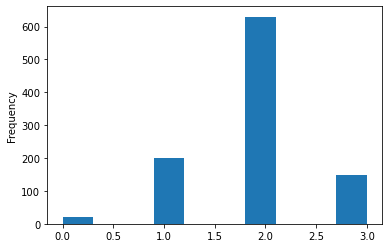

In [43]:
df['job'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

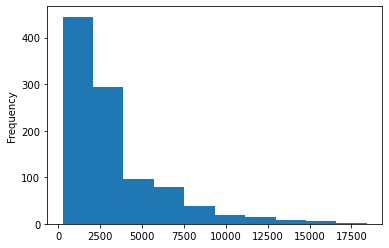

In [44]:
df['creditAmount'].plot(kind='hist')

In [45]:
df['creditAmount'].describe()

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: creditAmount, dtype: float64

<AxesSubplot:>

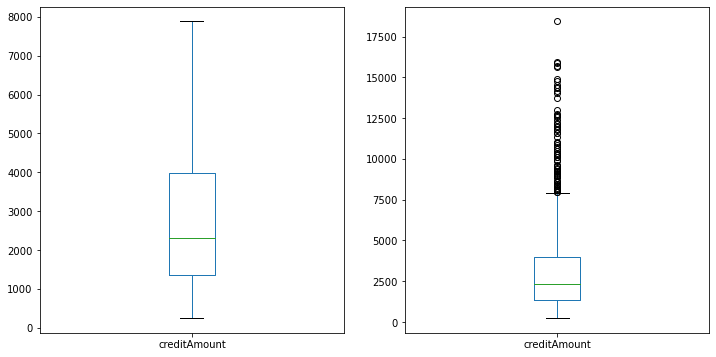

In [46]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6)) 
#figure(figsize=(7,5))
df['creditAmount'].plot(kind='box', showfliers=False, ax=axes[0])
df['creditAmount'].plot(kind='box', ax=axes[1])

In [47]:
df['sex'].value_counts()

male      690
female    310
Name: sex, dtype: int64

In [48]:
df['job'].value_counts()

2    630
1    200
3    148
0     22
Name: job, dtype: int64

In [49]:
df['housing'].value_counts()

own     713
rent    179
free    108
Name: housing, dtype: int64

In [50]:
df['savingAccount'].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: savingAccount, dtype: int64

In [51]:
df['savingAccount'].isnull().sum() / df.shape[0]

0.183

In [52]:
df['checkingAccount'].value_counts()

little      274
moderate    269
rich         63
Name: checkingAccount, dtype: int64

In [53]:
df['checkingAccount'].isnull().sum() / df.shape[0]

0.394

In [54]:
df.head()

,age,sex,job,housing,savingAccount,checkingAccount,creditAmount,duration,purpose,risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


<AxesSubplot:>

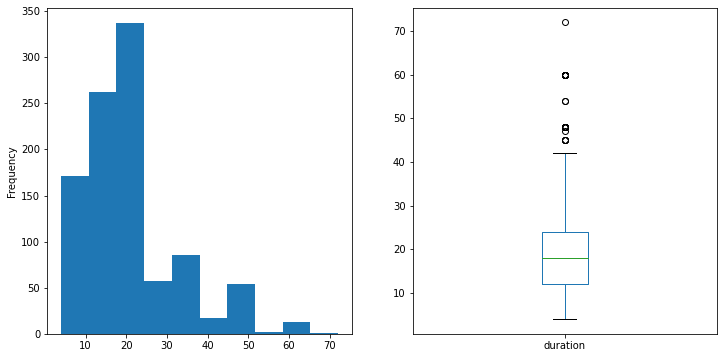

In [55]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6)) 
df['duration'].plot(kind='hist', ax=axes[0])
df['duration'].plot(kind='box', ax=axes[1])

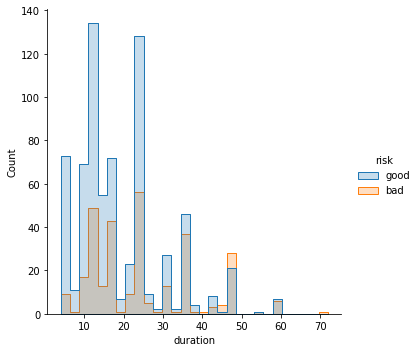

In [56]:
import seaborn as sns
sns.displot(df, x="duration", hue="risk", element="step")

In [57]:
df['purpose'].value_counts()

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: purpose, dtype: int64

In [60]:
df.isnull().sum()

age                  0
sex                  0
job                  0
housing              0
savingAccount      183
checkingAccount    394
creditAmount         0
duration             0
purpose              0
risk                 0
dtype: int64

Text(0, 0.5, 'Duration')

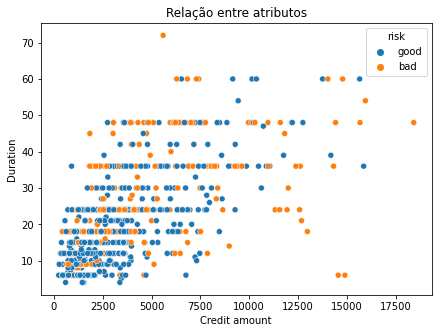

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5))

import seaborn as sns
x = sns.scatterplot(x='creditAmount', y='duration', data=df, hue='risk')
x.set_title("Relação entre atributos")
x.set_xlabel("Credit amount")
x.set_ylabel("Duration")

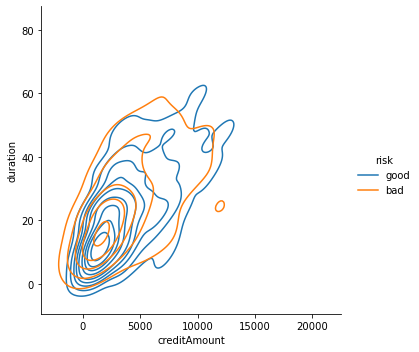

In [62]:
sns.displot(df, x="creditAmount", y="duration", hue='risk', kind="kde")

<AxesSubplot:xlabel='savingAccount', ylabel='count'>

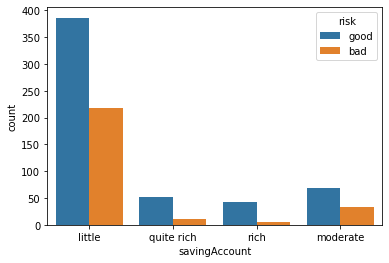

In [63]:
sns.countplot(data=df, x="savingAccount", hue="risk")

<AxesSubplot:xlabel='checkingAccount', ylabel='count'>

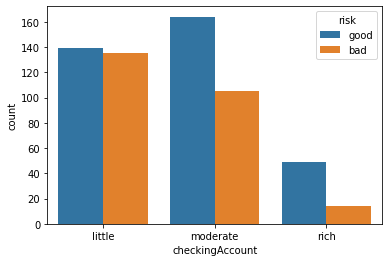

In [64]:
sns.countplot(data=df, x="checkingAccount", hue="risk")

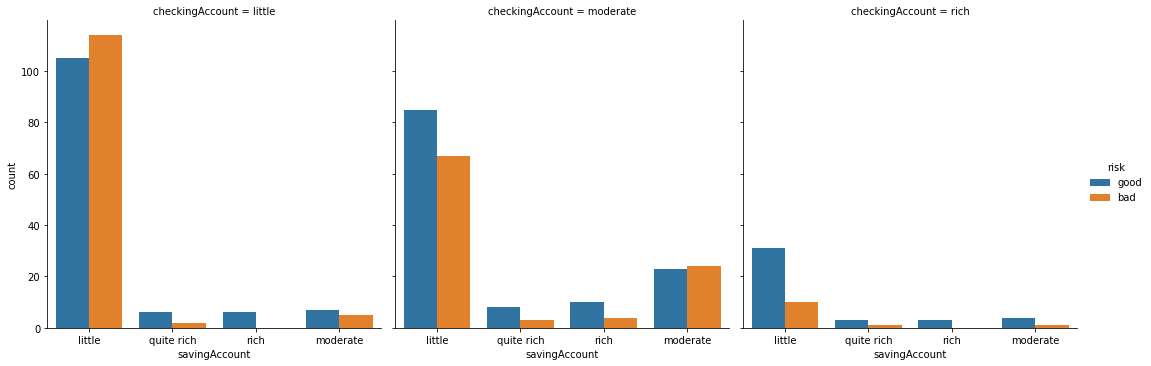

In [65]:
sns.catplot(data=df, col="checkingAccount", x="savingAccount", hue="risk", kind="count")

<AxesSubplot:xlabel='creditAmount', ylabel='duration'>

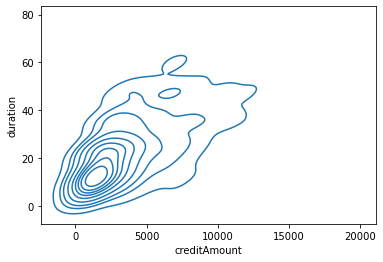

In [67]:
import warnings
warnings.filterwarnings('ignore')
sns.kdeplot(df['creditAmount'], df['duration'])

<AxesSubplot:xlabel='creditAmount', ylabel='duration'>

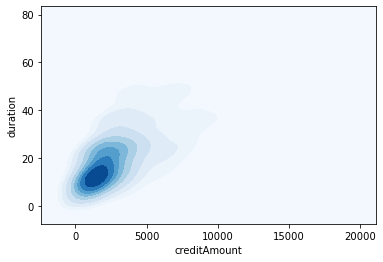

In [68]:
sns.kdeplot(df['creditAmount'], df['duration'], cmap="Blues", shade=True, shade_lowest=True)

bad          AxesSubplot(0.1,0.15;0.363636x0.75)
good    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

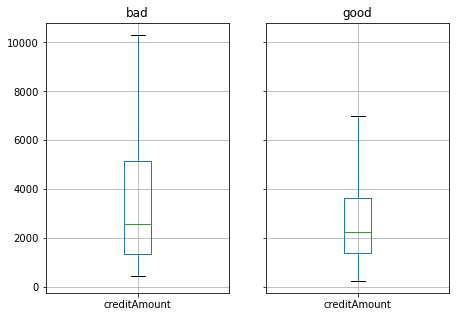

In [70]:
grouped = df[['creditAmount','risk']].groupby('risk')
grouped.boxplot(figsize=(7,5), showfliers=False)

In [71]:
df.shape

(1000, 10)

# Separando parte dos exemplos para validação final

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:9], df['risk'], test_size=0.1, random_state=4)

In [73]:
X_train.head()

,age,sex,job,housing,savingAccount,checkingAccount,creditAmount,duration,purpose
239,39,male,2,own,little,little,2522,30,radio/TV
304,44,male,2,free,quite rich,NaN,10127,48,car
964,22,male,1,own,little,moderate,454,6,repairs
102,24,female,2,own,little,NaN,932,6,radio/TV
867,42,male,2,own,little,NaN,3331,12,furniture/equipment


In [74]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(900, 9)
(900,)
(100, 9)
(100,)


In [75]:
y_train.value_counts()

good    628
bad     272
Name: risk, dtype: int64

In [76]:
y_test.value_counts()

good    72
bad     28
Name: risk, dtype: int64

### Gravando os datasets de treinamento e validação

In [82]:
train = X_train
train['risk'] = y_train
print(train.shape)
train.head()

(900, 10)


,age,sex,job,housing,savingAccount,checkingAccount,creditAmount,duration,purpose,risk
239,39,male,2,own,little,little,2522,30,radio/TV,good
304,44,male,2,free,quite rich,NaN,10127,48,car,bad
964,22,male,1,own,little,moderate,454,6,repairs,good
102,24,female,2,own,little,NaN,932,6,radio/TV,good
867,42,male,2,own,little,NaN,3331,12,furniture/equipment,good


In [83]:
train.to_csv('../../../dataset/german_credit_train.csv')

In [84]:
validation = X_test
validation['risk'] = y_test
print(validation.shape)
validation.head()

(100, 10)


,age,sex,job,housing,savingAccount,checkingAccount,creditAmount,duration,purpose,risk
698,24,male,2,own,little,NaN,1800,18,radio/TV,good
577,33,female,2,own,NaN,NaN,1927,24,education,good
763,30,male,3,free,NaN,NaN,12680,21,car,bad
790,39,female,2,own,little,moderate,1188,21,business,bad
520,44,male,2,free,little,NaN,5507,24,repairs,good


In [85]:
validation.to_csv('../../../dataset/german_credit_validation.csv')